In [5]:
import uproot
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams['text.usetex'] = True


In [6]:
df_z = {'df': uproot.open('./z_jet_files_jets.root')['tnjets'].arrays(library='pd'),				'color' : 'red', 	'label': 'Z jets'}
df_zmDT = {'df': uproot.open('./z_jet_files_jets_mDT0.04.root')['tnjets'].arrays(library='pd'),		'color' : 'orange', 	'label': 'Z mDT jets'}
df_g = {'df': uproot.open('./glue_jet_files_jets.root')['tnjets'].arrays(library='pd'),				'color' : 'blue', 	'label': 'gluon jets'}
df_q = {'df': uproot.open('./quark_jet_files_jets.root')['tnjets'].arrays(library='pd'),			'color' : 'green', 	'label': 'quark jets'}

ddfs = [df_z, df_zmDT, df_g, df_q]
for i, ddf in enumerate(ddfs):
	df = ddf['df']
	ddf['df_filtered'] = df.loc[(df['pt'] > 500) & (df['pt'] < 550) & (df['tau21']>0)]

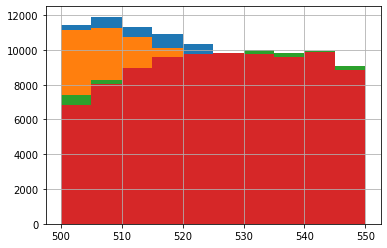

In [7]:
for i, ddf in enumerate(ddfs):
	df = ddf['df_filtered']
	hist = df['pt'].hist()

/home/ploskon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ploskon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ploskon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

Text(0, 0.5, 'Density')

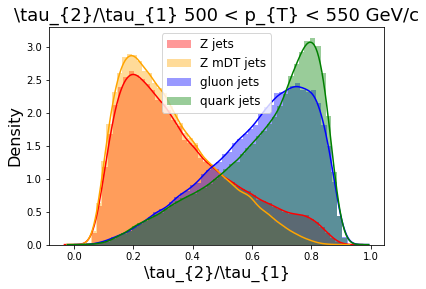

In [8]:
for i, ddf in enumerate(ddfs):
	df = ddf['df_filtered']
	sns.distplot(df['tau21'],kde=True, color=ddf['color'], bins=50, label=ddf['label'])
plt.legend(prop={'size': 12})
plt.title(r'\tau_{2}/\tau_{1} 500 < p_{T} < 550 GeV/c', fontsize=18)
plt.xlabel(r'\tau_{2}/\tau_{1}', fontsize=16)
plt.ylabel('Density', fontsize=16)
